In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [4]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [16]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
X_train.shape

(8000, 11)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [21]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


2024-06-15 16:00:12.807680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 16:00:12.807846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 16:00:12.957467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [58]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


To increase accuracy you have to try different variations of algorithm
1. Incraese no. of layers
2. change activation function to 'relu' from sigmoid
3. Increase epochs from 10 to 100 or more
4. Can plot accuracy score along with loss while trainig itself
5. Try to split the training set to validation set also to check the result while training using 

1. and 2. 
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

3. model.fit(X_train_scaled,y_train,epochs=100)

4.model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])
5.

In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [62]:
history= model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7860 - loss: 0.5688 - val_accuracy: 0.7975 - val_loss: 0.4763
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4567 - val_accuracy: 0.8050 - val_loss: 0.4431
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8199 - loss: 0.4209 - val_accuracy: 0.8163 - val_loss: 0.4243
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.4161 - val_accuracy: 0.8194 - val_loss: 0.4135
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8296 - loss: 0.3992 - val_accuracy: 0.8250 - val_loss: 0.4062
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8255 - loss: 0.4033 - val_accuracy: 0.8250 - val_loss: 0.4008
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8296 - loss: 0.4007 - val_accuracy: 0.8263 - val_loss: 0.3943
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.3890 - val_accu

In [63]:
model.layers[0].get_weights()

[array([[-0.07964183, -0.05967322,  0.13278581, -0.22193381,  0.08521586,
          0.00320586,  0.08177767,  0.04191807,  0.11992098, -0.27302316,
          0.01861707],
        [-0.02398425,  0.5871209 , -0.44704378, -0.32087618, -0.02342761,
          1.2180343 ,  0.07633732, -0.6010889 , -1.6287745 ,  0.5525795 ,
         -0.7749296 ],
        [-0.03050259,  0.01859734, -0.07589387,  0.01442876, -0.01595494,
          0.01959999,  0.17210698, -0.3603095 , -0.06350415,  0.15037562,
         -0.01662258],
        [-0.3069998 ,  0.34984776, -0.26083785, -0.00932099, -0.3186603 ,
         -0.16320255,  0.4214196 ,  0.06769247,  0.367262  , -0.41172403,
          0.02626086],
        [-1.3495678 ,  1.1284459 ,  0.31149772, -0.30575126, -0.5021635 ,
         -0.7603976 , -0.06758723, -0.27412215, -0.07667509, -0.08381   ,
         -0.7149858 ],
        [-0.03805031,  0.00559191,  0.07825329, -0.01055199, -0.13524243,
         -0.08893439, -0.11155794,  0.32104304, -0.12646504,  0.1862765

In [64]:
model.layers[1].get_weights()

[array([[-0.38710037, -0.5885208 ,  0.32898533, -0.6405627 , -0.2261636 ,
          0.22826177, -0.52256066, -0.553647  , -0.34719428,  0.820062  ,
         -0.27511486],
        [-0.5008956 , -0.06428527, -0.1249903 , -0.209263  , -0.0732678 ,
         -0.2211647 , -0.27024156, -0.13054836,  1.614852  , -0.24512291,
         -0.19159025],
        [-0.41931015, -0.18085495,  0.08075358,  0.28283527,  0.34093416,
          0.01759157,  0.16336264,  0.42788428,  0.34241948, -0.37515086,
          0.2435446 ],
        [-0.22375092, -0.59688234,  0.41882497, -0.49000674, -0.45506093,
          0.5993273 ,  0.16346212,  0.50659466,  0.2637511 ,  0.48011312,
          0.63622415],
        [-0.30431503,  0.4367453 , -0.10306433,  0.16036277, -0.72509795,
          0.44840196,  0.4061733 , -0.02432762, -0.02215655,  0.23325147,
          0.31800988],
        [-0.21585755,  0.32770908, -0.5084542 ,  0.37892202,  0.24533273,
         -0.67481995, -0.6092923 ,  0.27318808, -0.7196717 ,  0.3667162

In [65]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02601183],
       [0.08516894],
       [0.04953519],
       ...,
       [0.00294303],
       [0.0360098 ],
       [0.40206608]], dtype=float32)

In [66]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [67]:
y_pred=np.where(y_log>0.5,1,0)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8655

In [71]:
import matplotlib.pyplot as plt


In [72]:
history.history

{'accuracy': [0.7942187786102295,
  0.7973437309265137,
  0.8203125,
  0.8276562690734863,
  0.8298437595367432,
  0.8315625190734863,
  0.8335937261581421,
  0.8326562643051147,
  0.8357812762260437,
  0.842968761920929,
  0.8475000262260437,
  0.8521875143051147,
  0.8540624976158142,
  0.8550000190734863,
  0.8578125238418579,
  0.8596875071525574,
  0.8579687476158142,
  0.8596875071525574,
  0.8604687452316284,
  0.8612499833106995,
  0.8629687428474426,
  0.8610937595367432,
  0.86328125,
  0.8607812523841858,
  0.8617187738418579,
  0.8631250262260437,
  0.8623437285423279,
  0.8629687428474426,
  0.8639062643051147,
  0.8635937571525574,
  0.8626562356948853,
  0.864062488079071,
  0.8642187714576721,
  0.8639062643051147,
  0.862500011920929,
  0.8639062643051147,
  0.8645312786102295,
  0.8637499809265137,
  0.8642187714576721,
  0.8639062643051147,
  0.8639062643051147,
  0.8662499785423279,
  0.8650000095367432,
  0.8650000095367432,
  0.86328125,
  0.8646875023841858,
  0.

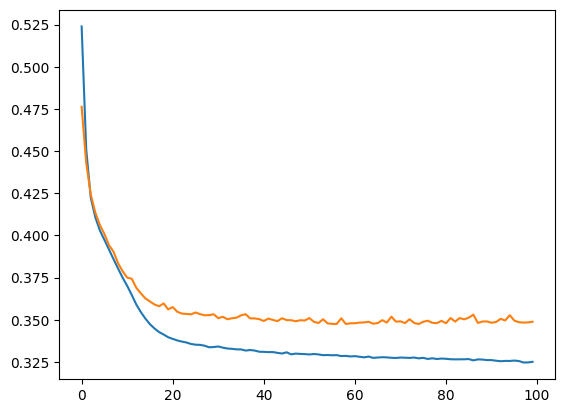

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

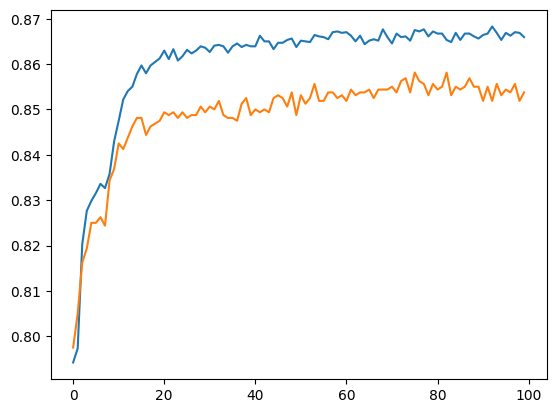

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])